In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Lets load and check our dataset. We will use the iris dataset

In [2]:
data = pd.read_csv("./data/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can see that we have four features. The last column which is species will be our classes. 
Now we will normalize our data.

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.iloc[:,:-1])
data.iloc[:,:-1] =  pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]))

Now lets check our data again

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [5]:
label_enc = LabelEncoder()
data["species"] = label_enc.fit_transform(data["species"])

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


Now we will check the correlation between our features. 
As we can see there is high correlation between features such as petal_length and petal_width. 

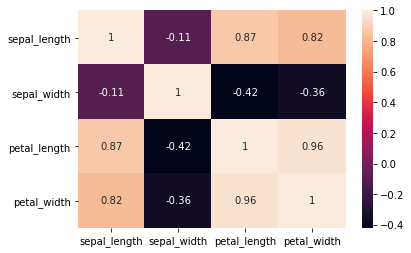

In [7]:
X = data.iloc[:,:-1] # remove the species column
sns.set_palette("RdBu")
correlation = X.corr() #correlation
sns.heatmap(correlation,annot=True)
plt.show()

The purpose of this notebook is to build knn from scratch. Since we can't draw 4-D plots we will reduce the input dimension into two using PCA.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

pca_out = pca.fit_transform(X)

Now lets form our new data with pca values

In [9]:
data = data[["species"]]
data["c1"] = pca_out[:,0]
data["c2"] = pca_out[:,1]
data = data[["c1","c2","species"]]

Now we will divide our data into two sets which are train and test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.33, random_state=42)

KNN algorithm works in a simple way. For each test sample we calculate the Euclidian distance between the whole training examples. We determine the label of a sample using the labels of k closest examples (which gives the algorithm its name). Our label prediction is the most occuring label among these k neigbors. k is a parameter we determine. Notice that we don't have a training phase. We make predictions using our training set.  


In [11]:
y_pred = []
k_neighbor = 3


for i in X_test.values:
    dist = np.linalg.norm(X_train.values - i,axis=1) # we can calculate the euclidian distance in a single expression
    
    arg_dist = np.argsort(dist)[:k_neighbor] # sort samples and get indices of first k (top k closest) 
    neigbour_labels = y_train.values[arg_dist]
    
    vals, counts = np.unique(neigbour_labels, return_counts = True)
    label = vals[np.argmax(counts)]
    y_pred.append(label)
y_pred = np.array(y_pred)

Now check our accuracy on the test set

In [12]:
100*(y_pred == y_test).sum()/len(y_test)

96.0

Now we will look at sci-kit's KNN.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
scikit_pred = neigh.predict(X_test)

In [15]:
100*(scikit_pred == y_test).sum()/len(y_test)

96.0

On the cell above we see that we get the same accuracy with our implementation using sci-kit's knn. We will check what percentage of our predictions is same with scikit's.

In [16]:
100*(scikit_pred == y_pred).sum()/len(y_pred)

100.0

Now lets look plot the data. First we will show test samples with our predicted labels. Each color corresponds to a different label. In  this plot we show training set samples with a circle marker and test set samples with a + marker. Notice how test set samples blend in with training set samples.

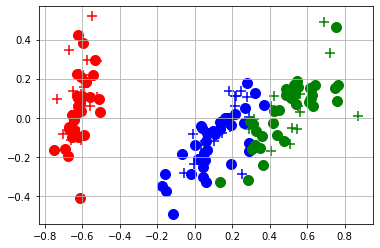

In [17]:
fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for g in np.unique(y_test):
    ix = np.where(y_test == g)[0]
    ax.scatter(X_test.iloc[ix,0], X_test.iloc[ix,1], c = cdict[g], label = g, s = 100, marker = "+")
for g in np.unique(y_train):
    ix = np.where(y_train == g)[0]
    ax.scatter(X_train.iloc[ix,0], X_train.iloc[ix,1], c = cdict[g], label = g, s = 100, marker = "o")
plt.grid()